# **Aviation Industry Risk Analysis**

### **Overview**

This project analyzes which aircrafts have the lowest risk for Peanut Butter INC. to enter the commercial and private enterprises industry. We are making our recommendation based on 90,000 incident records over the past 70 years.




### **Business Problem**

Peanut Butter INC. is expanding in to new industries to diversify its portfolio. They are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.

We are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.

### **Data Understanding**

In the data folder is a dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

# **Importing Packages**

---

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# **Importing Project Data**

---

In [232]:
# Importing Avaiation_Data.csv:
df = pd.read_csv('data/Aviation_Data.csv', encoding='latin-1', low_memory=False)

Checking:  
- .head() 
- .tail()
- .info()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.info()

# **General Data Cleaning**

---

Baseline Changes to Aviation_Data:

In [242]:
# Clean column names, replacing . to _ and making them lowercase
df = df.rename(columns={c: c.lower().replace('.', '_') for c in df.columns})

# Fortmating all object columns lowercase
df['make'] = df['make'].str.lower()
df['model'] = df['model'].str.lower()
df['city'] = df['city'].str.lower()
df['state'] = df['state'].str.lower()
df['location'] = df['location'].str.lower()
df['investigation_type'] = df['investigation_type'].str.lower()
df['country'] = df['country'].str.lower()
df['injury_severity'] = df['injury_severity'].str.lower()
df['aircraft_category'] = df['aircraft_category'].str.lower()
df['engine_type'] = df['engine_type'].str.lower()
df['amateur_built'] = df['amateur_built'].str.lower()

#dropping the columns we will not be using
df = df[['location','investigation_type','event_date','country',
         'injury_severity','aircraft_category','make',
         'model','number_of_engines','engine_type','total_fatal_injuries',
         'total_uninjured','total_serious_injuries','total_minor_injuries',
         'latitude','longitude','amateur_built']]

# Convert event_date column to datetime format
df['event_date'] = pd.to_datetime(df['event_date'])

# We will be looking at data from 2001 to 2022
df = df[df['event_date'] > '2001-11-19']

# Creating a new dataframe with data from the US
df = df[df['country'] == 'united states']

# Split location column into city and state columns + Cleaning format
df[['city', 'state']] = df['location'].str.split(', ', n=1, expand=True)

# Droping 7 missing null values in location
df.dropna(subset=['location'], inplace=True)

# populating injury_severity based on fatalities =/or/!= 0
df.loc[(df['total_fatal_injuries'] == 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'non-fatal'
df.loc[(df['total_fatal_injuries'] != 0) & (df['injury_severity'].isna()), 'injury_severity'] = 'fatal'

# Cleaning amateur_built formatting + filtering to NOT amateur built
df = df[df['amateur_built'] == 'no']

# Droping 9 missing values in Make/Model + cleaning data
df.dropna(subset=['make'], inplace=True)
df.dropna(subset=['model'], inplace=True)

# Adding placeholder in 'state' for missing values = 'unknown' 
df['state'] = df['state'].fillna('unknown')

# Adding placeholder in 'longitude' & 'latitude' for missing values = 'unknown' 
df['longitude'] = df['longitude'].fillna('unknown')
df['latitude'] = df['latitude'].fillna('unknown')

# Dropping 883 missing values in number_of_engines + number_of_engines >= 1
df.dropna(subset=['number_of_engines'], inplace=True)
df = df[df['number_of_engines'] >= 1]

# Cleaning 'aircraft_category' with null values
engine_types = ['reciprocating', 'turbo prop', 'turbo fan', 'turbo jet']
df.loc[(df['aircraft_category'].isnull()) & (df['engine_type'].isin(engine_types)), 'aircraft_category'] = 'airplane'

# Dropping everything except 'Airplane' in engine_type
df.loc[~df['engine_type'].isin(engine_types), 'engine_type'] = np.nan
df.dropna(subset=['engine_type'], inplace=True)

# Filling missing value in total_fatal_injuries, total_serious_injuries, and total_minor_injuries
df['total_fatal_injuries'] = df['total_fatal_injuries'].fillna(0)
df['total_serious_injuries'] = df['total_serious_injuries'].fillna(0)
df['total_minor_injuries'] = df['total_minor_injuries'].fillna(0)
df['total_uninjured'] = df['total_minor_injuries'].fillna(0)


In [246]:
df.isna().sum().sort_values(ascending=False)

state                     0
number_of_engines         0
investigation_type        0
event_date                0
country                   0
injury_severity           0
aircraft_category         0
make                      0
model                     0
engine_type               0
city                      0
total_fatal_injuries      0
total_uninjured           0
total_serious_injuries    0
total_minor_injuries      0
latitude                  0
longitude                 0
amateur_built             0
location                  0
dtype: int64

# **Indivudal Dataframes for visualizations**

In [ ]:
#Jimmy df
commercial_df = df
# Stuart df

# **Needed?**

---

In [ ]:
#Cleaning the injury severity column
usa_df['injury_severity'] = usa_df['injury_severity'].replace(regex=r'Fatal\(\d+\)', value='Fatal')

In [ ]:
# Import necessary libraries
from geopy.geocoders import Nominatim
import pandas as pd

# Create geolocator object
geolocator = Nominatim(user_agent="my_app")

# Loop through each row in dataframe
for index, row in usa_df.iterrows():
    # Check if latitude and longitude are missing
    if pd.isnull(row['latitude']) or pd.isnull(row['longitude']):
        # Get location string
        location = str(row['airport_name']) + ', ' + str(row['country'])
        # Use geolocator to get latitude and longitude
        try:
            location = geolocator.geocode(location)
            usa_df.at[index, 'latitude'] = location.latitude
            usa_df.at[index, 'longitude'] = location.longitude
        except:
            pass

In [ ]:
usa_df.loc[usa['total_fatal_injuries'].isna(), 'total_fatal_injuries']=0

minor_injuries=usa_df.loc[(usa_df['total_uninjured'].notna()) & (usa_df['total_minor_injuries'].notna())]
minor_injuries_ratio=minor_injuries['total_minor_injuries'].sum()/minor_injuries['total_uninjured'].sum()

serious_injuries=usa_df.loc[(usa_df['total_uninjured'].notna()) & (usa_df['total_serious_injuries'].notna())]
serious_injuries_ratio=serious_injuries['total_serious_injuries'].sum()/serious_injuries['total_uninjured'].sum()

usa_df.loc[usa_df['total_uninjured'].isna(), 'total_uninjured']=usa_df['total_uninjured'].median()
usa_df.loc[us_df['total_minor_injuries'].isna(), 'total_minor_injuries']=round(minor_injuries_ratio*usa_df['total_uninjured'], 0)
usa_df.loc[usa_df['total_serious_injuries'].isna(), 'total_serious_injuries']=round(serious_injuries_ratio*usa_df['total_uninjured'], 0)

# **Private Plane Analysis**

---

NameError: name 'private_planes' is not defined

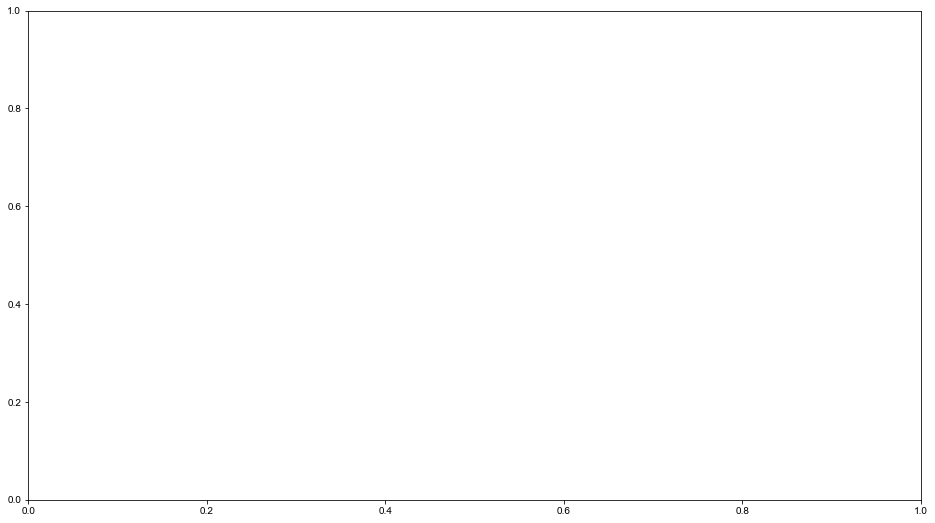

In [241]:
#Creating a figure showing investigation occurance by Airplane Make
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['make'].value_counts().index[:20], y=private_planes['make'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Makes Found in Investigations')
makes.set_xlabel('Make', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['make'].value_counts().index[:20], rotation=-45, ha='left');
plt.show()

#Showing fatalities by Airplane Make
fatalities=private_planes.groupby('make')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Make', fontsize=15)
f.set_xlabel('Make', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()


#Creating a figure showing investigation frequnecy by Airplane Model
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
makes=sns.barplot(data=private_planes, x=private_planes['model'].value_counts().index[:20], y=private_planes['model'].value_counts().values[:20])
makes.set_title('20 Most Frequent Airplane Models Found in Accidents', fontsize=15)
makes.set_xlabel('Model', fontsize=15)
makes.set_ylabel('Number of Occurrences', fontsize=15)
makes.set_xticklabels(private_planes['model'].value_counts().index[:20], rotation=-45, ha='center');
plt.show()

#Showing fatalities by Airplane Model
fatalities=private_planes.groupby('model')['total_fatal_injuries'].sum().sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(16,9))
sns.set_style('darkgrid')
f=sns.barplot(data=private_planes, x=fatalities.index[:20], y=fatalities.values[:20])
f.set_title('Fatalities by Airplane Model', fontsize=15)
f.set_xlabel('Model', fontsize=15)
f.set_ylabel('Fatalities', fontsize=15)
f.set_xticklabels(fatalities.index[:20], rotation=-45, ha='left');
plt.show()

# **Commerical Plane Analysis**

---

# **Location of Operation Analysis**

---